# Machine Learning: Decision Tree / CART Regression

### Importing the python libraries, modules

In [34]:
# Import Python Libraries: NumPy and Pandas
import pandas as pd
import numpy as np
# Import Libraries & modules for data visualization
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
# Import scit-Learn module for the algorithm/model: Linear Regression
from sklearn. tree import DecisionTreeRegressor
# Import scikit-Learn module to split the dataset into train/ test sub-datasets
from sklearn.model_selection import train_test_split
# Import scikit-Learn module for K-fold cross-validation - algorithm/modeL evaluation & validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### Loading the dataset

In [39]:
# Specify location of the dataset
filename = 'housing_boston.csv'

In [40]:
# Specify the fields with their names
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
'LSTAT', 'MEDV']

In [41]:
# Load the data into a Pandas DataFrame
df = pd.read_csv(filename, names=names)

In [42]:
# VIP NOTES: Extract a sub-dataset from the original one -- > dataframe: df2
df2 = df[['RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'MEDV']]

### Pre-processing the dataset

In [43]:
# mark zero values as missing or NaN
df[['RM', 'PTRATIO', 'MEDV']] = df[['RM', 'PTRATIO', 'MEDV']].replace(0, np.NaN)
# count the number of NaN values in each
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


### Performing the EDA on the dataset

In [44]:
# Get the dimensions or Shape of the dataset i.e. number of records/rows x number of variables/columns
print(df2.shape)

(452, 6)


In [45]:
# Get the data types of all variabLes/attributes of the data set 
print(df2.dtypes)

RM         float64
AGE        float64
DIS        float64
RAD          int64
PTRATIO    float64
MEDV       float64
dtype: object


In [46]:
# Get several records/rows at the top of the dataset
# Get the first five records
print(df2.head(5))

      RM   AGE     DIS  RAD  PTRATIO  MEDV
0  6.575  65.2  4.0900    1     15.3  24.0
1  6.421  78.9  4.9671    2     17.8  21.6
2  7.185  61.1  4.9671    2     17.8  34.7
3  6.998  45.8  6.0622    3     18.7  33.4
4  7.147  54.2  6.0622    3     18.7  36.2


In [47]:
# Get the summary statistics of the numeric variables/attributes of the dataset
print(df2.describe())

               RM         AGE         DIS         RAD     PTRATIO        MEDV
count  452.000000  452.000000  452.000000  452.000000  452.000000  452.000000
mean     6.343538   65.557965    4.043570    7.823009   18.247124   23.750442
std      0.666808   28.127025    2.090492    7.543494    2.200064    8.808602
min      3.561000    2.900000    1.129600    1.000000   12.600000    6.300000
25%      5.926750   40.950000    2.354750    4.000000   16.800000   18.500000
50%      6.229000   71.800000    3.550400    5.000000   18.600000   21.950000
75%      6.635000   91.625000    5.401100    7.000000   20.200000   26.600000
max      8.780000  100.000000   12.126500   24.000000   22.000000   50.000000


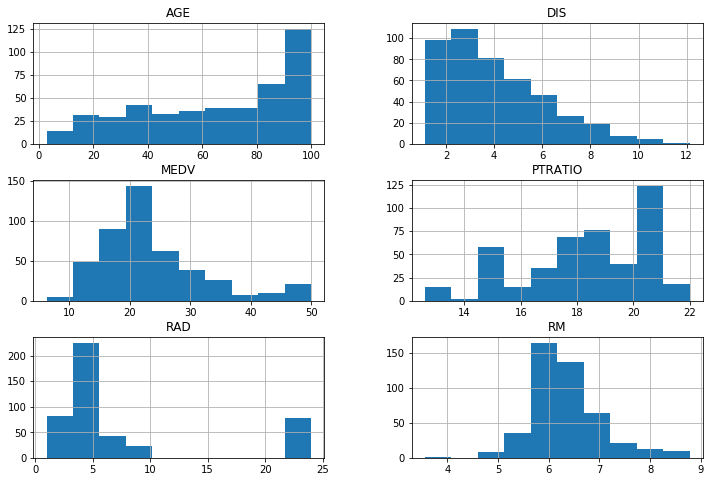

In [48]:
# Plot histrogram for each numeric
df2.hist(figsize=(12, 8))
pyplot.show()

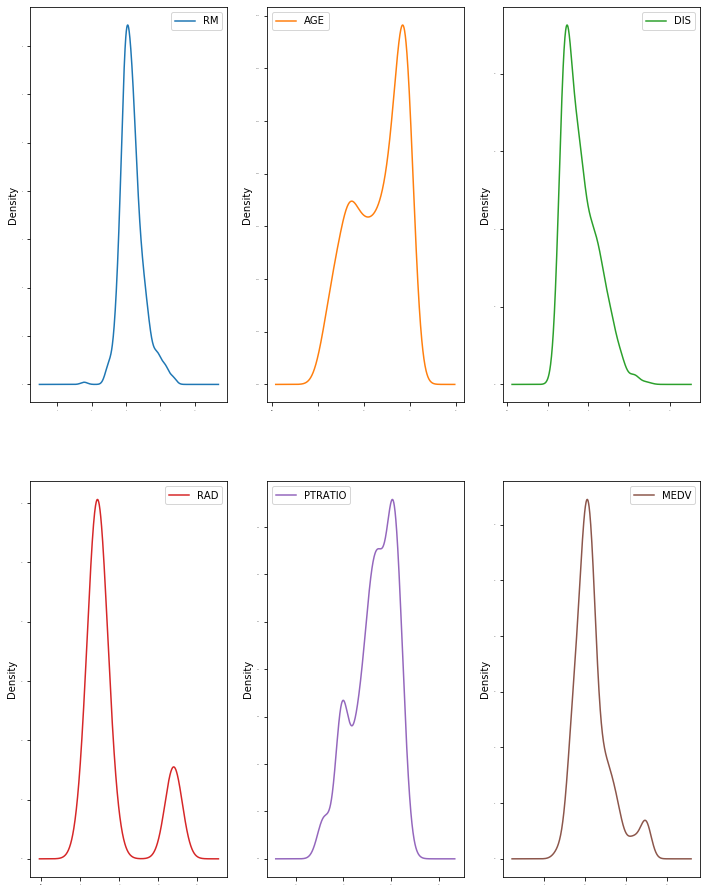

In [49]:
# Density plots
# IMPORTANT NOTES: 5 numeric variables -> at Least 5 plots -> Layout (2, 3): 2 rows, each row
# with 3 plots
df2.plot(kind='density', subplots=True, layout=(2, 3), sharex=False, legend=True, fontsize=1,
figsize=(12, 16))
pyplot.show()

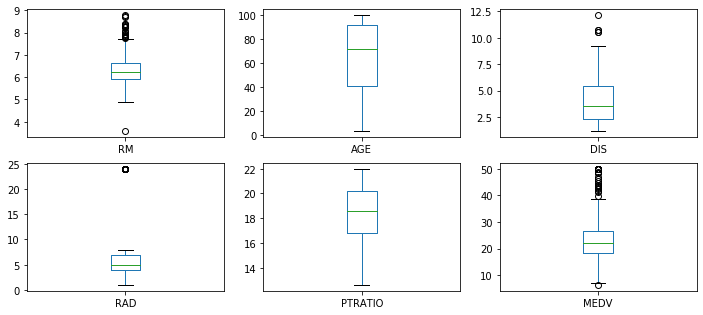

In [50]:
df2.plot(kind='box', subplots=True, layout=(3,3), sharex=False, figsize=(12,8))
pyplot.show()

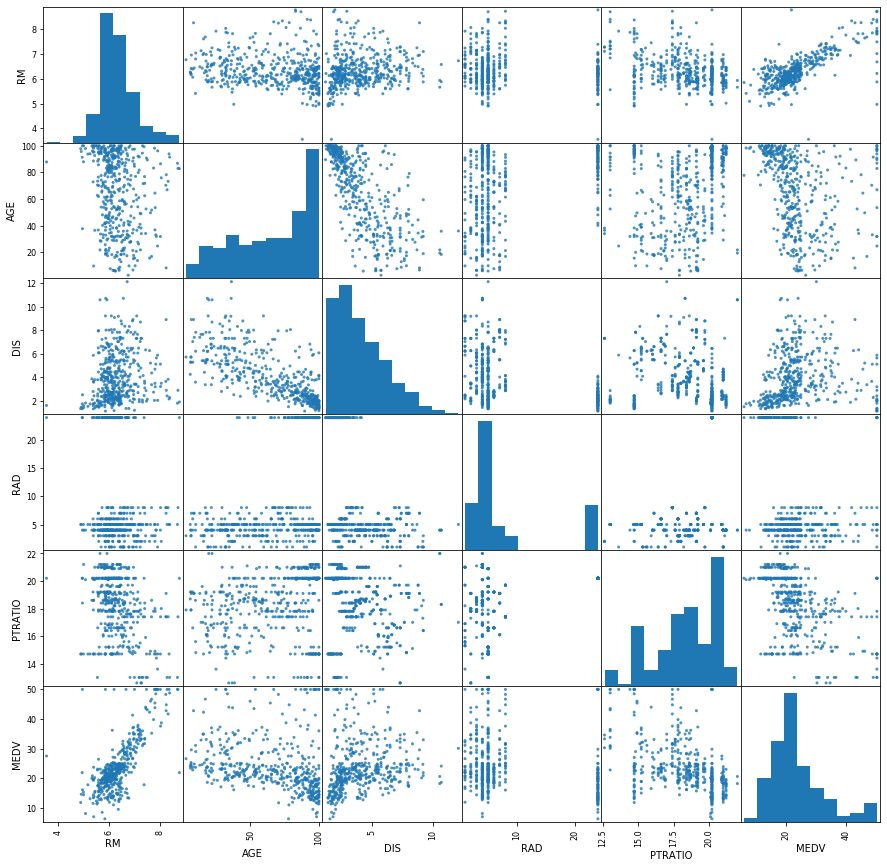

In [51]:
# scatter plot matrix
scatter_matrix(df2, alpha=0.8, figsize=(15, 15))
pyplot.show()

### Separating dataset into Input & Output arrays

In [52]:
# Store dataframe values into a numpy array
array = df2.values

# separate array into input and output components by slicing
# For X (input)[:, 5] --> all the rows, columns from 0 - 4 (5 - 1)
X = array[:,0:5]

# For Y (output)[:, 5] --> all the rows, column index 5 (Last column)
Y = array[:,5]

In [53]:
# Split the dataset --> training sub-dataset: 67%; test sub-dataset:
test_size = 0.33

In [54]:
# Selection of records to include in which sub-dataset must be done randomly
# use this seed for randomization
seed = 7

In [55]:
# Split the dataset (both input & outout) into training/testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)

### Building / Training the model

In [56]:
# Build the model
model = DecisionTreeRegressor()

# Train the model using the training sub-dataset
model.fit(X_train,Y_train)

# Non-Linear --> NO coefficients and the intercept
DecisionTreeRegressor (criterion='mse', max_depth=None, max_features=None,
max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1,
min_samples_split=2, min_weight_fraction_leaf=0.0 ,presort=False, random_state=None,
splitter='best')

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort=False,
                      random_state=None, splitter='best')

### Calculating R-Squared

In [58]:
R_squared = model.score(X_test, Y_test)
print(R_squared)

0.5585942825505291


# Prediction / Validation

In [75]:
model.predict([[6.0, 55, 5, 2, 16]])

array([22.9])

### Evaluate/Validate Algorithm/Model Using K-Fold Cross-Validation

In [59]:
# Evaluate the algorithm
# Specify the K-size
num_folds = 10

# Fix the random seed
# must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 7

# Split the whole data set into folds
kfold = KFold(n_splits=num_folds, random_state=seed)

# For Linear regression, we can use MSE (mean squared error) value
# to evaluate the model/algorithm
scoring = 'neg_mean_squared_error'

# Train the model and run K-foLd cross-validation to validate/evaluate the model
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

# Print out the evaluation results
# Result: the average of all the results obtained from the k-foLd cross-validation
print(results.mean())

-40.285635748792274


C:\Users\rvkot\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


* After we train we evaluate
* Use K-Fold to determine if the model is acceptable
* We pass the whole set because the system will divide for us -40 avg of all error (mean of square errors) this value would traditionally be positive value, but scikit reports as negative.
* Square root would be between 6 and 6.5